In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/HumanPseAAC/HumanPseAAC3106_train_MVMD.mat'
testpath = '../datasets/HumanPseAAC/HumanPseAAC3106_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)

delete_indices = [3, 8, 13]
train_labels = np.delete(train_labels, delete_indices, 1)
test_labels = np.delete(test_labels, delete_indices, 1)

print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 1244/1244 [00:00<00:00, 8224.97it/s]

Train data shape:  (1862, 1, 120)
Train labels shape:  (1862, 11)
Test data shape:  (1244, 1, 120)
Test labels shape:  (1244, 11)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (310, 1, 120)
Train Labels shape is  (310, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [24:13<00:00,  1.72it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 2) (1244, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.395498  |
| zero_one_loss       | 0.751608  |
| one_error           | 0.0393891 |
| micro av. jaccard   | 0.25228   |
| macro av. jaccard   | 0.172696  |
| micro av. precision | 0.257165  |
| macro av. precision | 0.194859  |
| micro av. recall    | 0.929972  |
| macro av. recall    | 0.596774  |
| micro av. f1        | 0.402913  |
| macro av. f1        | 0.284566  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 2) (1244, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.395498  |
| zero_one_loss       | 0.751608  |
| one_error           | 0.0393891 |
| micro av. jaccard   | 0.25228   |
| macro av. jaccard   | 0.172696  |
| micro av. precision | 0.257165  |
| macro av. pr

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 3
Class 1, class 1 neurons = 2, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [47:02<00:00,  1.13s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 2) (1244, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0872186 |
| zero_one_loss       | 0.174437  |
| one_error           | 0         |
| micro av. jaccard   | 0.114286  |
| macro av. jaccard   | 0.0654206 |
| micro av. precision | 0.189189  |
| macro av. precision | 0.0945946 |
| micro av. recall    | 0.224     |
| macro av. recall    | 0.148936  |
| micro av. f1        | 0.205128  |
| macro av. f1        | 0.115702  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 4) (1244, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.243971 |
| zero_one_loss       | 0.766077 |
| one_error           | 0        |
| micro av. jaccard   | 0.229206 |
| macro av. jaccard   | 0.118574 |
| micro av. precision | 0.248281 |
| macro av. precision 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 6
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 4
Class 3, class 1 neurons = 2, class 0 neurons = 5
Class 4, class 1 neurons = 3, class 0 neurons = 1
Class 5, class 1 neurons = 1, class 0 neurons = 3


100%|██████████| 2500/2500 [1:20:15<00:00,  1.93s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 2) (1244, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.387862  |
| zero_one_loss       | 0.745981  |
| one_error           | 0.0297428 |
| micro av. jaccard   | 0.126697  |
| macro av. jaccard   | 0.0671141 |
| micro av. precision | 0.135922  |
| macro av. precision | 0.0679612 |
| micro av. recall    | 0.651163  |
| macro av. recall    | 0.457516  |
| micro av. f1        | 0.2249    |
| macro av. f1        | 0.118343  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 6) (1244, 6)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.298232  |
| zero_one_loss       | 0.979904  |
| one_error           | 0         |
| micro av. jaccard   | 0.183419  |
| macro av. jaccard   | 0.0974008 |
| micro av. precision | 0.197707  |
| macro av. pr

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 8
Class 1, class 1 neurons = 4, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 5
Class 3, class 1 neurons = 4, class 0 neurons = 6
Class 4, class 1 neurons = 4, class 0 neurons = 2
Class 5, class 1 neurons = 1, class 0 neurons = 3
Class 6, class 1 neurons = 1, class 0 neurons = 1
Class 7, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 2500/2500 [1:45:33<00:00,  2.53s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 2) (1244, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.220659  |
| zero_one_loss       | 0.42926   |
| one_error           | 0.0120579 |
| micro av. jaccard   | 0.191458  |
| macro av. jaccard   | 0.166063  |
| micro av. precision | 0.208     |
| macro av. precision | 0.18149   |
| micro av. recall    | 0.706522  |
| macro av. recall    | 0.638039  |
| micro av. f1        | 0.321384  |
| macro av. f1        | 0.282239  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 8) (1244, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.277633 |
| zero_one_loss       | 0.985531 |
| one_error           | 0        |
| micro av. jaccard   | 0.185676 |
| macro av. jaccard   | 0.114408 |
| micro av. precision | 0.200509 |
| macro av. precision 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 13
Class 1, class 1 neurons = 5, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 8
Class 3, class 1 neurons = 7, class 0 neurons = 9
Class 4, class 1 neurons = 7, class 0 neurons = 3
Class 5, class 1 neurons = 1, class 0 neurons = 3
Class 6, class 1 neurons = 2, class 0 neurons = 4
Class 7, class 1 neurons = 3, class 0 neurons = 4
Class 8, class 1 neurons = 3, class 0 neurons = 1
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 2500/2500 [5:36:57<00:00,  8.09s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 3) (1244, 3)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.228832   |
| zero_one_loss       | 0.604502   |
| one_error           | 0.00160772 |
| micro av. jaccard   | 0.354497   |
| macro av. jaccard   | 0.225317   |
| micro av. precision | 0.379757   |
| macro av. precision | 0.249652   |
| micro av. recall    | 0.842011   |
| macro av. recall    | 0.527006   |
| micro av. f1        | 0.523438   |
| macro av. f1        | 0.33594    |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(1244, 11) (1244, 11)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.257819 |
| zero_one_loss       | 0.997588 |
| one_error           | 0        |
| micro av. jaccard   | 0.232209 |
| macro av. jaccard   | 0.14161  |
| micro av. precision | 0.252604 |
| macro

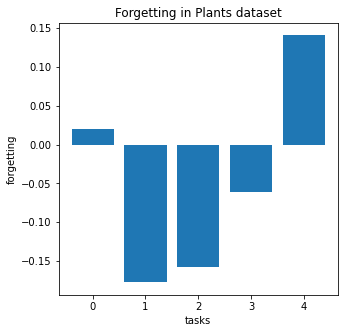

In [3]:
hparams_dict = {
    'inputs': 120,
    'outputs': 11,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Plants',
    'tasks': {'samples': [310]*4 + [622], 'labels': [2]*4 + [3]},
    'seed': 2,
    'ckpt_dir': './checkpoints/human/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)